In [1]:
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import load_img
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import os

In [2]:
TRAIN_DIR = 'E:\Jupyter_Notebook\Face Emotion Recognition\images\\train'
TEST_DIR = 'E:\Jupyter_Notebook\Face Emotion Recognition\images\\test'

In [3]:
def createdataframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
# 16:00

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                                   image     label
0      E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
1      E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
2      E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
3      E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
4      E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
...                                                  ...       ...
28816  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
28817  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
28818  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
28819  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
28820  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                                                  image     label
0     E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
1     E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
2     E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
3     E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
4     E:\Jupyter_Notebook\Face Emotion Recognition\i...     angry
...                                                 ...       ...
7061  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
7062  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
7063  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
7064  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise
7065  E:\Jupyter_Notebook\Face Emotion Recognition\i...  surprise

[7066 rows x 2 columns]


In [8]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features=np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [9]:
train_features= extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [10]:
test_features= extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [15]:
model = Sequential()
# 
model.add(Conv2D(128,kernel_size=(3,3), activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
# 
model.add(Dense(7, activation='softmax'))


In [16]:
# Correct the loss function name
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Now you can use model.fit with the correct loss function
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

model_json = model.to_json()
with open("Faceemotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("Faceemotiondetector.h5")

Epoch 1/5
 93/226 [===========>..................] - ETA: 7:24 - loss: 1.8342 - accuracy: 0.2335

KeyboardInterrupt: 

In [ ]:
json_file= open("emotondetector.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [ ]:
label  = ['angry',"disgust","fear","happy","neutral ","sad ","surprise "]

In [ ]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
image = "images/train/sad/42.jpg"
print("sad org")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model --> ",pred_label)

sad org


c:\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
model -->  sad 


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

sad org
1/1 [==============================] - 0s 29ms/step
model -->  sad 


c:\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


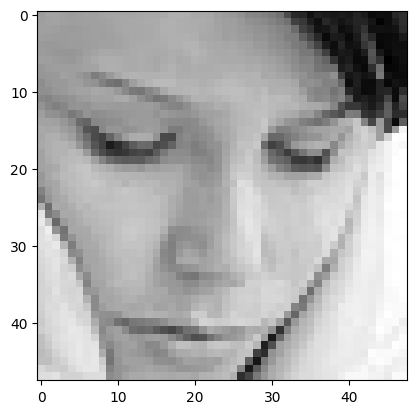

In [ ]:
image = "images/train/sad/42.jpg"
print("sad org")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model --> ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

happy org
1/1 [==============================] - 0s 21ms/step
model -->  happy


c:\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


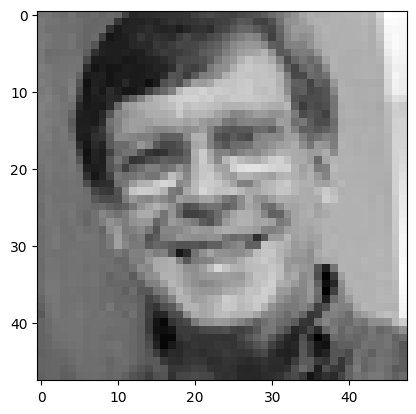

In [ ]:
image = "images/train/happy/10135.jpg"
print("happy org")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model --> ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

sur org
1/1 [==============================] - 0s 30ms/step
model -->  surprise 


c:\Python311\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


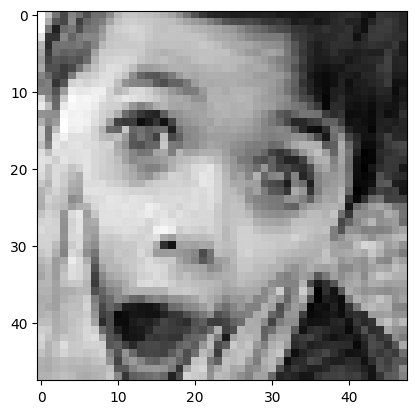

In [ ]:
image = "images/train/surprise/10261.jpg"
print("sur org")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model --> ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')